In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 7:  Linear Algebra Part 2

## Question 1

In a previous homework we computed the Lebesgue constants for a set of interpolation points.  Now we are going to directly relate this to ill-conditioning of a matrix.  For this question let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ respectively.

**(a)** (12 points) Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.  Note that this is not simply the Vandermonde matrix (but does involve it).  If you need to assume invertibility of a matrix then justify under what conditions that it is invertible.

Given two sets of data,

$$\begin{aligned}
\begin{bmatrix}x \\ u \end{bmatrix} & = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \\ u_1 & u_2 & \cdots & u_n \end{bmatrix} \\
\begin{bmatrix}y \\ v \end{bmatrix} & = \begin{bmatrix} y_1 & y_2 & \cdots & y_m \\ v_1 & v_2 & \cdots & v_m \end{bmatrix} 
\end{aligned}$$

Since the dimension of $x$ is n, We can find a unique $(n-1)^{th}$ order interpolating polynomial via Vandermonde matrix.

$$V_x = \left[ \begin{matrix} 1 & x_1 & x_1^2 & \ldots & x_1^{n-1} \\ 1 & x_2 & x_2^2 & \ldots & x_2^{n-1} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \ldots & x_n^{n-1} \\ \end{matrix} \right ]$$

such that

$$V_x p = u$$

where $p$ is the coefficient vector of interpolating polynomail fitting data at ${x_j}$.

Becasue $V_x$ is a square matrix, this matrix equation can be solve by

$$p = V_x^{-1}u $$

Now we want to use the same polynomial to fit data at ${y_j}$ such that $ V_y p = v $. ($v$ is the data at ${y_i}$)

where
$$V_y = \left[ \begin{matrix} 1 & y_1 & y_1^2 & \ldots & y_1^{n-1} \\ 1 & y_2 & y_2^2 & \ldots & y_2^{n-1} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & y_m & y_m^2 & \ldots & y_m^{n-1} \\ \end{matrix} \right ]
$$

Plug in $p = V_x^{-1}u$,

$$V_y p = V_y(V_x^{-1}u) = v$$

Since $v = V_yV_x^{-1}u$, so we can say 

$$A = V_yV_x^{-1}$$

and A maps the data at ${x_j}$ (or $u$) to data at ${y_j}$ (or $v$).

**(b)** (12 points) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

/home/yan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide


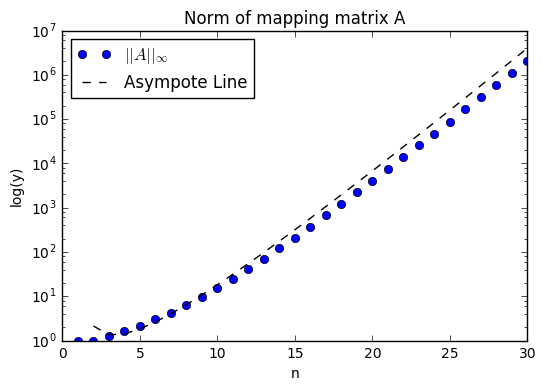

In [12]:
### INSERT CODE HERE
A_norm = numpy.zeros(30)
N = numpy.array(range(1,31))
for n in N:
    m = 2.0 * n - 1.0
    x = numpy.linspace(-1.0, 1.0, n)
    y = numpy.linspace(-1.0, 1.0, m)
    V_y = numpy.vander(y, N = n, increasing=True)
    V_x = numpy.vander(x, N = n, increasing=True)
    A = numpy.dot(V_y, numpy.linalg.inv(V_x))
    A_norm[n-1] = numpy.linalg.norm(A,numpy.inf) 
    
plt.title('Norm of mapping matrix A')
plt.xlabel('n')
plt.ylabel('log(y)')
plt.semilogy(N,A_norm,'bo',label = '$||A||_{\infty}$')
plt.semilogy(N,2.0**N/(numpy.exp(1.0)*(N-1.0)*numpy.log(N)),'k--',label = 'Asympote Line')
plt.legend(loc = 2)

plt.show()

**(c)** (12 points) For $n=1,2,\ldots,30$ and $m=2n-1$, what is the $\infty$-norm condition number $\kappa$ of the problem of interpolating the constant function 1?  Connect this result back to conditioning of the matrix, the order of the polynomial, and what this implies.

Hint:  Use the expression we found involving the Jacobian.

Let's consider interpolating constant function 1 at $[x_1, x_2, ..., x_n]$.

This polynomial is expressed as  $$\mathcal{P}(x_j) = p_0 + p_1x + p_2x^2 + ... + p_nx^n$$

Condition number is expressed as $\kappa = \frac{||J(x)||}{||f(x)||/||x||}$

$$\begin{aligned}
f(x) = 1 & \Rightarrow ||f(x)||_\infty = 1 \\
max({x_j}) = 1 & \Rightarrow ||x||_\infty = 1 \\
J(x) = \frac{\partial \mathcal{P}(x)}{\partial x} &\Rightarrow ||J(x)||_\infty = ||p_1 + 2p_2 + ... + np_nx^{n-1}||_\infty
\end{aligned}$$

$$\therefore ~ \kappa = ||p_1 + 2p_2 + ... + np_nx^{n-1}||_\infty$$

Hence, if n is increased, the condition number of this interpolating polynomial (or problem) increases as well. In this situation, the problme becomes more sensitive to purturbation.

**(a)** (10 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

Find $U$ by row reduction.
$$    
    \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix} \xrightarrow{-2R_1 + R_2}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        16 & 36 & 7
    \end{bmatrix} \xrightarrow{-4R_1 + R_3}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 4 & 3
    \end{bmatrix} \xrightarrow{-R_2 + R_3}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix} = U
$$

In the reduction operation

$-2R_1 + R_2$ is equal to $E_{21} = \begin{bmatrix} 1 & 0 & 0 \\ -2 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

$-4R_1 + R_3$ is equal to $E_{31} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ -4 & 0 & 1 \end{bmatrix}$

$-R_2 + R_3$ is equal to $E_{32} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & -1 & 1 \end{bmatrix}$

Hence, the reduction operation process is $E_{32}E_{31}E_{21}A = U$, move the operation matrix to right-hand side and we can find $L$ matrix via $$A = LU = (E_{32})^{-1} (E_{31})^{-1} (E_{21})^{-1} U$$
 
Fortunately, the inverse matrix of elementary matrices $E_{21}$, $E_{31}$ and $E_{32}$ just changing the sign of off-diagonal entries.

$$L = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}  \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 4 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & 1 & 1 \end{bmatrix}$$

Now verify the answer,
$$A = LU = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & 1 & 1 \end{bmatrix} \begin{bmatrix} 4 & 8 & 1 \\ 0 & 4 & 2 \\ 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} 4 & 8 & 1 \\ 8 & 20 & 4 \\ 16 & 36 & 7 \end{bmatrix}$$

**(b)** (12 points) Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages beyond the `argmax` function and basic array constructors.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [30]:
A = numpy.array([[10, 1, 1, 0], [4, 3, 3, 1], [8, 7, 8, 5], [6, 7, 9, 8]], dtype=float)
print A
j = 2
max_row =  max(xrange(j, n), key=lambda i: abs(A[i, j]))
print max_row

[[ 10.   1.   1.   0.]
 [  4.   3.   3.   1.]
 [  8.   7.   8.   5.]
 [  6.   7.   9.   8.]]


IndexError: index 4 is out of bounds for axis 0 with size 4

In [31]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    ### INSERT CODE HERE
    r"""
    Compute PA = LU factorization
    
    """
    n = len(A)
    L = numpy.identity(n)
    P = numpy.identity(n)
    U = A.copy()
    for j in xrange(n):
        max_row =  max(xrange(j, n), key=lambda i: abs(U[i, j]))
        # Rearrange the U matrix such that the largest element of j-th column is placed on the diagonal of of U
        # P matrix: needs identical swapping as U
        # L matrix: only off-traingullar entries swapped 
        if j != max_row:
            swap_rows(j, max_row, P)
            swap_rows(j, max_row, L, column_indices = [0,j])
            swap_rows(j, max_row, U)
        #Row reduction for lower triangular entries
        #The reduction radio is exactly corresponding entry of L matrix
        for i in xrange(n):
            if i > j:
                L[i, j] = U[i, j] / U[j, j]
                U[i,:] -= L[i, j]*U[j,:]
    return P, L, U

In [32]:
import scipy.linalg
# Use this array if you want to check your results but remember to check the random case!
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print "Success!"

Success!


**(c)** (10 points) For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` beyond `dot` other than to check your solution.

In [221]:
#Testing Block 
import scipy
import scipy.linalg
A = scipy.array([ [4.0, 8.0, 1.0], [8.0, 20.0, 4.0], [16.0, 36.0, 7.0]])
b = numpy.array([1, 2, 3])
#Answer
x = numpy.linalg.solve(A,b)
print x

P, L, U = LU_factorization(A)
print "A ="
print A
print "P ="
print P
print "L ="
print L
print "U ="
print U

#Solve Ly = Pb
n = len(A)
Pb = numpy.dot(P, b)
y = Pb.copy()
for i in xrange(0,n-1):
    y[i+1:] -= y[i] * L[i+1:,i]
#Solve Ux = y
x = y.copy()

for i in reversed(xrange(n)):
    for j in reversed(xrange(n)):
        if j > i:
            x[i] -= U[i, j] * x[j]
        elif j == i:
            x[i] /= U[i, i]
print  x

[-0.5  0.5 -1. ]
A =
[[  4.   8.   1.]
 [  8.  20.   4.]
 [ 16.  36.   7.]]
P =
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
L =
[[ 1.    0.    0.  ]
 [ 0.5   1.    0.  ]
 [ 0.25 -0.5   1.  ]]
U =
[[ 16.   36.    7. ]
 [  0.    2.    0.5]
 [  0.    0.   -0.5]]
[-0.5  0.5 -1. ]


In [7]:
def solve(A, b):
    ### INSERT CODE HERE
    P, L, U = LU_factorization(A)
    #Solve Ly = Pb
    n = len(A)
    Pb = numpy.dot(P, b)
    y = Pb.copy()
    for i in xrange(0,n-1):
        y[i+1:] -= y[i] * L[i+1:,i]
    #Solve Ux = y
    x = y.copy()
    for i in reversed(xrange(n)):
        for j in reversed(xrange(n)):
            if j > i:
                x[i] -= U[i, j] * x[j]
            elif j == i:
                x[i] /= U[i, i]
    return x

In [8]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print "Success!"

Success!


## Question 3 - QR and Least-Squares

(15 points) Using either the modified Grahm-Schmidt orthogonalization or Householder triangularization write a function that solves the least-squares problem given a set of data and a polynomial order.  Note that this is basically the same question as before from homework 6 except this time we want to use QR factorization.  This time we have provided a plotting function should you want to use it.  Compute the resulting linear system using the appropriate substitution from question 2.

In [33]:
#testing block
N = 4 
N_p = 3
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
print data
n = N_p
#Generate Vandermonde matrix
A = numpy.vander(data[:,0], N_p + 1, increasing= True)
print "A ="
print A
#Calculate modified QR
m = A.shape[0]
n = A.shape[1]
Q = numpy.empty((m, n))
R = numpy.zeros((n, n))
v = A.copy()
for i in xrange(n):
    R[i, i] = numpy.linalg.norm(v[:, i], ord=2) 
    Q[:, i] = v[:, i] / R[i, i]
    for j in xrange(i + 1, n):
        R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
        v[:, j] -= R[i, j] * Q[:, i]
print "QR = "
print numpy.dot(Q,R)
print "Q ="
print Q
print "R ="
print R
#print Q.conjugate()
#print data[:,1]
b = numpy.dot(numpy.transpose(Q), data[:,1])
print b
p = numpy.linalg.solve(R, b)
print p
numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))

[[ 0.1                 1.2544957012740237]
 [ 0.3666666666666667  1.2630003885497154]
 [ 0.6333333333333333  1.3097506383199724]
 [ 0.9                 0.6117497414904522]]
A =
[[ 1.                  0.1                 0.01                0.001             ]
 [ 1.                  0.3666666666666667  0.1344444444444445
   0.0492962962962963]
 [ 1.                  0.6333333333333333  0.4011111111111111
   0.254037037037037 ]
 [ 1.                  0.9                 0.8100000000000001
   0.7290000000000001]]
QR = 
[[ 1.                  0.1                 0.01                0.001             ]
 [ 1.                  0.3666666666666667  0.1344444444444445
   0.0492962962962963]
 [ 1.                  0.6333333333333333  0.4011111111111111
   0.254037037037037 ]
 [ 1.                  0.9                 0.8100000000000001
   0.7290000000000001]]
Q =
[[ 0.5                -0.6708203932499369  0.4999999999999996
  -0.2236067977499742]
 [ 0.5                -0.2236067977499789 -0.50000

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

(mismatch 100.0%)
 x: array([ 1.420977, -2.37989 ,  7.838902, -6.881807])
 y: array([-6.881807,  7.838902, -2.37989 ,  1.420977])

In [34]:
def compute_lstsq(data, n):
    ### INSERT CODE HERE
    #Generate Vandermonde matrix
    A = numpy.vander(data[:,0], N_p + 1, increasing= True)
    print "A ="
    print A
    #Calculate modified QR
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    v = A.copy()
    for i in xrange(n):
        R[i, i] = numpy.linalg.norm(v[:, i], ord=2) 
        Q[:, i] = v[:, i] / R[i, i]
        for j in xrange(i + 1, n):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
            v[:, j] -= R[i, j] * Q[:, i]
    #Solve Rp = Q*y or Rp = b
    b = numpy.dot(numpy.transpose(Q), data[:,1])
    p = numpy.linalg.solve(R, b)
    return p

def plot_lstsq(data, x, p):
    P = numpy.zeros(100)
    for n in xrange(p.shape[0]):
        P += p[n] * x**n
        
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(data[:, 0], data[:, 1], 'ko', label='data')
    axes.plot(x, P, 'r', label='interpolant')
    axes.set_title("Interpolant of order %s for %s data points" % (N - 1, N))
    axes.set_xlabel("$x$")
    axes.set_ylabel("$P(x)$ and data")
    axes.legend()

A =
[[ 1.                  0.1                 0.01                0.001             ]
 [ 1.                  0.3666666666666667  0.1344444444444445
   0.0492962962962963]
 [ 1.                  0.6333333333333333  0.4011111111111111
   0.254037037037037 ]
 [ 1.                  0.9                 0.8100000000000001
   0.7290000000000001]]
Success!


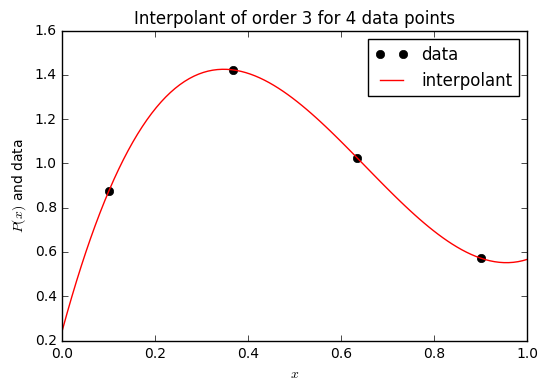

In [35]:
N = 4
N_p = 3
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
# numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

A =
[[  1.0000000000000000e+00   1.0000000000000001e-01
    1.0000000000000002e-02   1.0000000000000002e-03
    1.0000000000000003e-04]
 [  1.0000000000000000e+00   1.4210526315789473e-01
    2.0193905817174514e-02   2.8696603003353256e-03
    4.0779383215291471e-04]
 [  1.0000000000000000e+00   1.8421052631578949e-01
    3.3933518005540175e-02   6.2509112115468751e-03
    1.1514836442323192e-03]
 [  1.0000000000000000e+00   2.2631578947368422e-01
    5.1218836565096959e-02   1.1591631433153523e-02
    2.6233692190821131e-03]
 [  1.0000000000000000e+00   2.6842105263157895e-01
    7.2049861495844872e-02   1.9339699664674151e-02
    5.1911825415704299e-03]
 [  1.0000000000000000e+00   3.1052631578947365e-01
    9.6426592797783914e-02   2.9942994605627632e-02
    9.2980877985896319e-03]
 [  1.0000000000000000e+00   3.5263157894736841e-01
    1.2434903047091411e-01   4.3849394955532868e-02
    1.5462681379056327e-02]
 [  1.0000000000000000e+00   3.9473684210526316e-01
    1.55817174515235

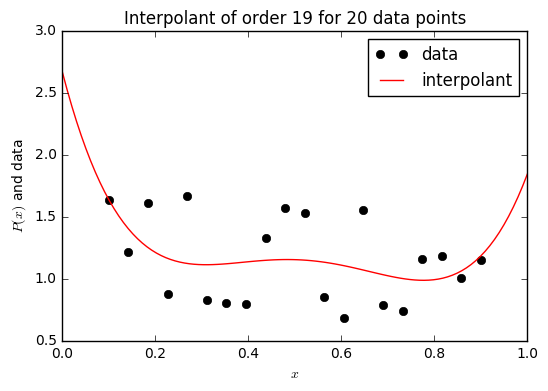

In [36]:
N = 20
N_p = 4
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

## Question 4 - Eigenvalues

**(a)** (12 points) Let $A$ be a $10 \times 10$ random matrix with entries from the normal distribution $R$, minus twice the identity
$$
    A = R - 2 I.
$$  
Write a function that plots $||e^{tA}||_2$ against $t$ for $0 \leq t \leq 20$ on a semilogy plot and compare it to the straight line $e^{t \alpha(A)}$ where $\alpha(A)$ is the spectral abscissa of $A$ defined as
$$
    \alpha(A) = \max_j \text{real}(\lambda_j).
$$
You can use the functions `numpy.eigvals`.

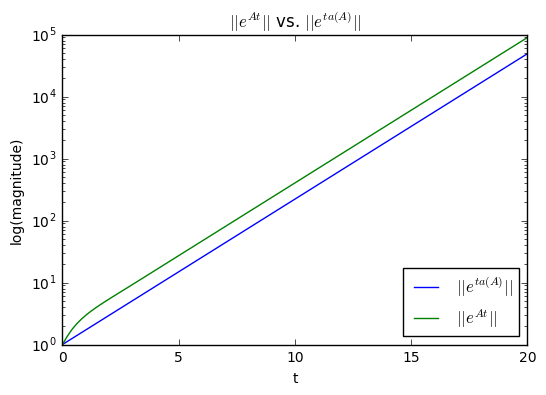

[-4.6086164215488061+2.2607310368953453j
 -4.6086164215488061-2.2607310368953453j  0.5400642434995261+0.j
 -0.7779224007728414+2.3516803979893051j
 -0.7779224007728414-2.3516803979893051j
 -1.7137703295959841+1.5206132853246781j
 -1.7137703295959841-1.5206132853246781j
 -1.7732164857282147+0.7131666733914066j
 -1.7732164857282147-0.7131666733914066j -3.3236272725421321+0.j                ]


In [83]:
### INSERT CODE HERE
from scipy.linalg import expm
A = numpy.random.randn(10, 10) - 2.0 * numpy.identity(10)
T = numpy.linspace(0, 20, 100)
alpha = numpy.amax(numpy.linalg.eigvals(A).real)

fig = plt.figure()
plt.semilogy(T, numpy.exp(alpha*T),'b', label = '$||e^{ta(A)}||$')
A_exp = numpy.zeros(T.shape[0])
for i, t in enumerate(T):
    A_exp[i]= numpy.linalg.norm(expm(t*A),ord=2)
plt.semilogy(T, A_exp, 'g',label = '$||e^{At}||$')
plt.title('$||e^{At}||$ vs. $||e^{ta(A)}||$')
plt.xlabel('t')
plt.ylabel('log(magnitude)')
plt.legend(loc = 4)
plt.show()
print numpy.linalg.eigvals(A)

**(b)** (5 points) Try this with ten different matrices and comment on the results.  What property of a matrix leads to a $||e^{tA}||_2$ curve that remains oscillatory at $t \rightarrow \infty$?

If the eigenvalues of matrix A contain notable imaginary part compared to real parts, the oscillation of $||e^{At}||$ becomes more noticeable.